In [3]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

In [5]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('../data/cleaned_fraud_data.csv')
df

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,transaction_count_per_user,transaction_velocity,hour_of_day,day_of_week
0,22058,1424818549000000000,2015-04-18 02:47:11,-0.160204,0.679914,7.327584e+08,0,1,0.0,2,5
1,333320,1433709590000000000,2015-06-08 01:38:54,-1.142592,2.304476,3.503114e+08,0,1,0.0,1,0
2,1359,1420138364000000000,2015-01-01 18:52:45,-1.197169,2.304476,2.621474e+09,1,1,0.0,18,3
3,150084,1430255605000000000,2015-05-04 13:54:50,0.385567,0.911994,3.840542e+09,0,1,0.0,13,0
4,221365,1437462592000000000,2015-09-09 18:40:53,0.112681,1.376155,4.155831e+08,0,1,0.0,18,2
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1422327814000000000,2015-03-29 00:30:47,0.330990,-0.596528,3.451155e+09,1,1,0.0,0,6
151108,274471,1431711809000000000,2015-05-26 12:24:39,-0.105627,-0.132367,2.439047e+09,0,1,0.0,12,1
151109,368416,1425424051000000000,2015-05-20 07:07:47,0.167258,-0.828608,2.748471e+09,0,1,0.0,7,2
151110,207709,1436472367000000000,2015-09-07 09:34:46,0.494721,0.447833,3.601175e+09,0,1,0.0,9,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     151112 non-null  int64  
 1   signup_time                 151112 non-null  int64  
 2   purchase_time               151112 non-null  object 
 3   purchase_value              151112 non-null  float64
 4   age                         151112 non-null  float64
 5   ip_address                  151112 non-null  float64
 6   class                       151112 non-null  int64  
 7   transaction_count_per_user  151112 non-null  int64  
 8   transaction_velocity        151112 non-null  float64
 9   hour_of_day                 151112 non-null  int64  
 10  day_of_week                 151112 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 12.7+ MB


In [9]:
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from standardization
exclude_columns = ['class', 'purchase_time']  # Exclude 'class' and any non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [10]:
# Drop a single column from the DataFrame
df1 = df.drop('purchase_time', axis=1)

In [11]:
## displaying the counts of each taget value
df1['class'].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

In [12]:
# Separate features and target variable
target_column = 'class'
X = df1.drop(target_column, axis=1)  # Features
y = df1[target_column]               # Target variable

In [13]:
df1.fillna(X.mean(), inplace=True)  # Replace NaN with column means

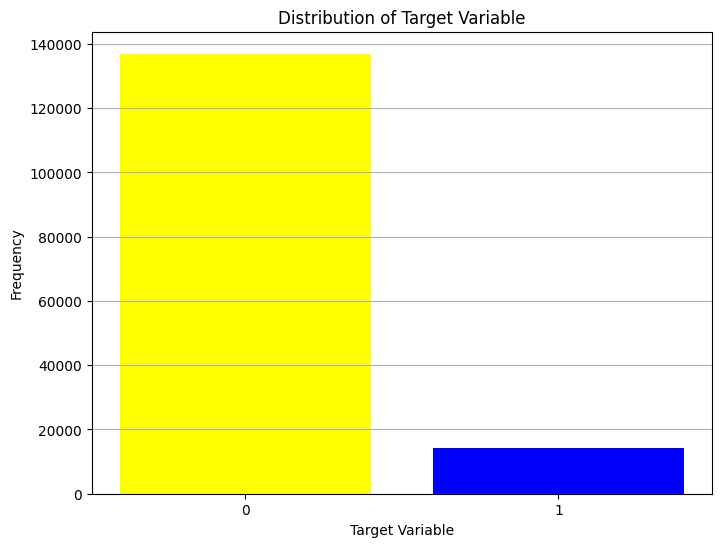

In [16]:
# visualize the target variable
# Define colors for each class
colors = ['yellow', 'blue']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [17]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

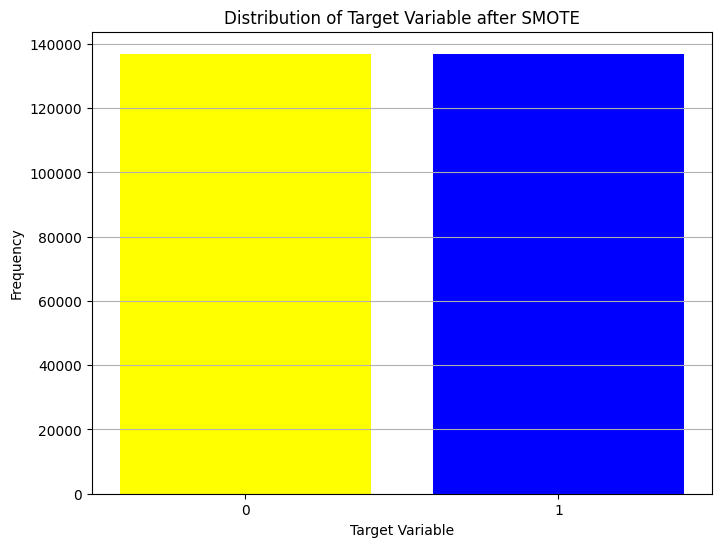

In [18]:
# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [19]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
df1.columns

Index(['user_id', 'signup_time', 'purchase_value', 'age', 'ip_address',
       'class', 'transaction_count_per_user', 'transaction_velocity',
       'hour_of_day', 'day_of_week'],
      dtype='object')

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

# Define the feature columns (excluding the target column 'class')
feature_columns = ['user_id', 'signup_time', 'purchase_value', 'age', 'ip_address',
                   'transaction_count_per_user', 'transaction_velocity', 'hour_of_day', 'day_of_week']

# Assuming X_train is a DataFrame with the relevant feature columns
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=feature_columns)

# Now, calculate mutual information
mi = mutual_info_classif(X_train_imputed, y_train)

# Convert mutual information scores to a Pandas Series
mi = pd.Series(mi, index=feature_columns)

# Sort the Series by mutual information scores
mi_sorted = mi.sort_values(ascending=False)

# Display the sorted Series
print(mi_sorted)

purchase_value                0.240234
age                           0.220212
hour_of_day                   0.203138
signup_time                   0.179158
ip_address                    0.138360
day_of_week                   0.092364
transaction_velocity          0.000758
transaction_count_per_user    0.000463
user_id                       0.000000
dtype: float64


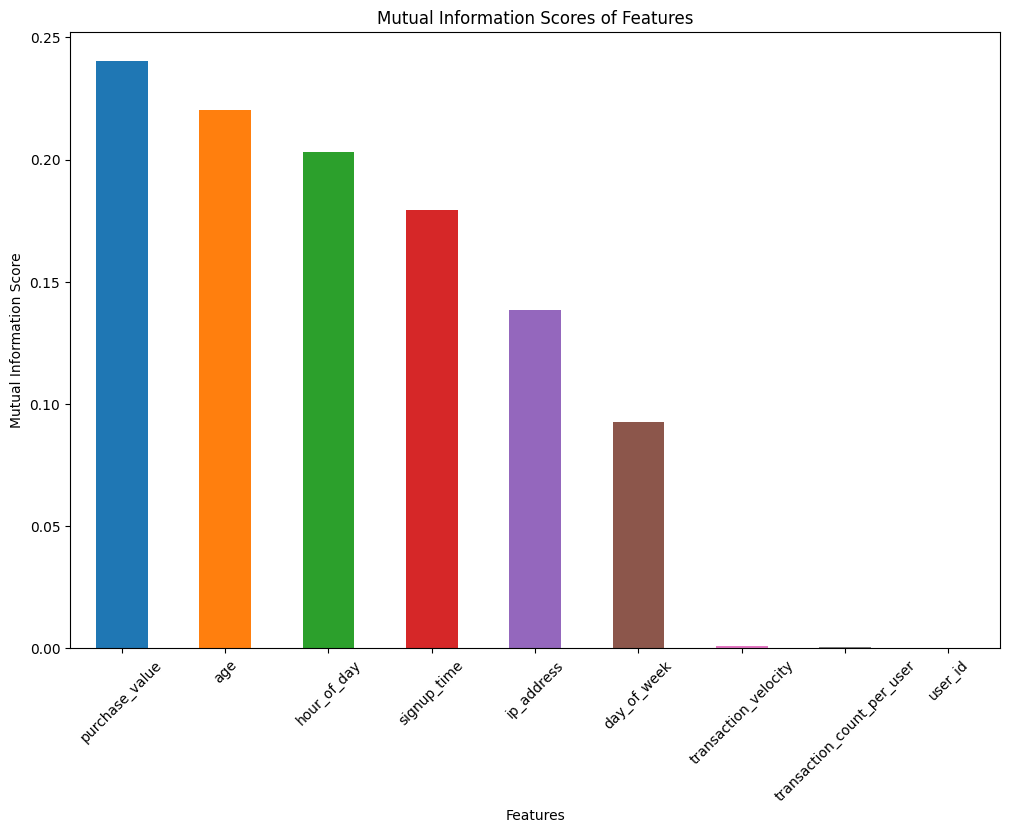

In [23]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9537
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     20528
           1       0.98      0.93      0.95     20560

    accuracy                           0.95     41088
   macro avg       0.95      0.95      0.95     41088
weighted avg       0.95      0.95      0.95     41088

Test Accuracy: 0.9541
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     20437
           1       0.98      0.93      0.95     20652

    accuracy                           0.95     41089
   macro avg       0.96      0.95      0.95     41089
weighted avg       0.96      0.95      0.95     41089



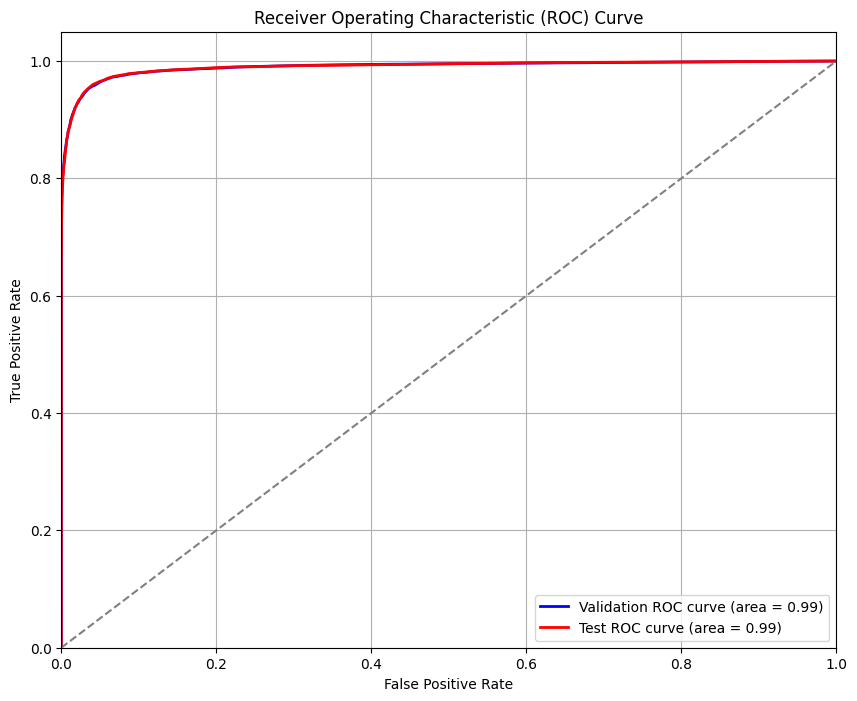

In [19]:
# Predict probabilities on the validation set
y_val_pred_prob = rf_clf.predict_proba(X_val)[:, 1]  # Get the probability of the positive class
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [20]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.9241
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20528
           1       0.92      0.93      0.92     20560

    accuracy                           0.92     41088
   macro avg       0.92      0.92      0.92     41088
weighted avg       0.92      0.92      0.92     41088

Test Accuracy: 0.9256
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20437
           1       0.92      0.94      0.93     20652

    accuracy                           0.93     41089
   macro avg       0.93      0.93      0.93     41089
weighted avg       0.93      0.93      0.93     41089



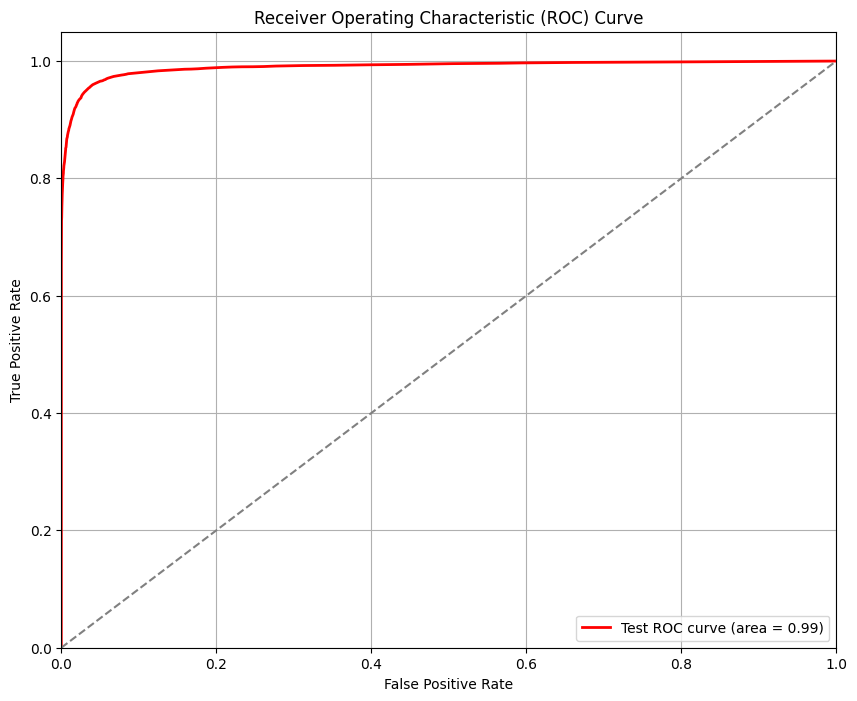

In [21]:
# Predict probabilities on the test set
y_test_pred_prob = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.6769
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67     20528
           1       0.67      0.71      0.69     20560

    accuracy                           0.68     41088
   macro avg       0.68      0.68      0.68     41088
weighted avg       0.68      0.68      0.68     41088

Test Accuracy: 0.6741
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66     20437
           1       0.67      0.71      0.69     20652

    accuracy                           0.67     41089
   macro avg       0.67      0.67      0.67     41089
weighted avg       0.67      0.67      0.67     41089



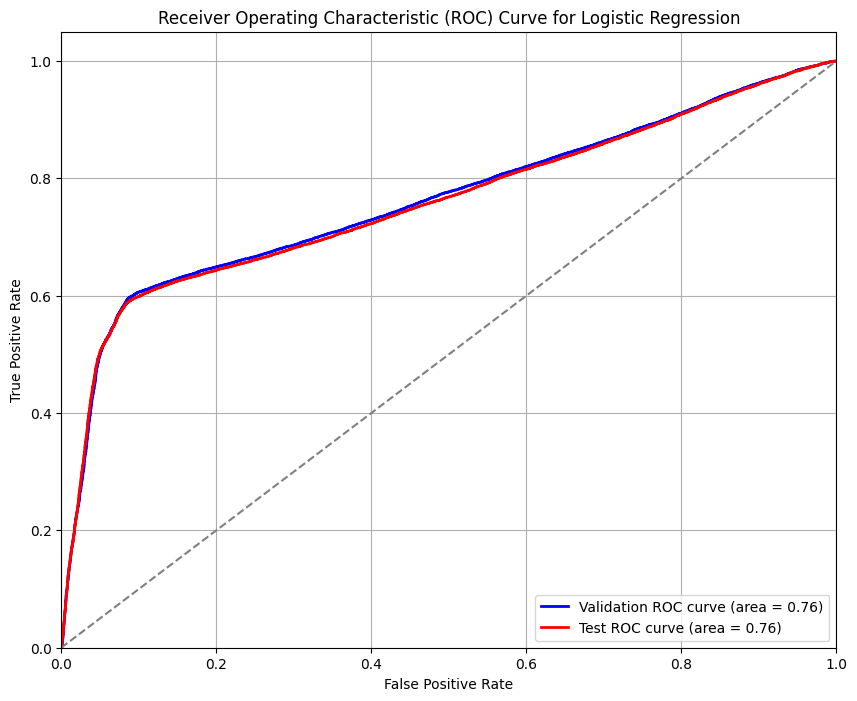

In [23]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gbm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = gbm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.8622
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     20528
           1       0.94      0.78      0.85     20560

    accuracy                           0.86     41088
   macro avg       0.87      0.86      0.86     41088
weighted avg       0.87      0.86      0.86     41088

Test Accuracy: 0.8610
Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     20437
           1       0.94      0.77      0.85     20652

    accuracy                           0.86     41089
   macro avg       0.87      0.86      0.86     41089
weighted avg       0.87      0.86      0.86     41089



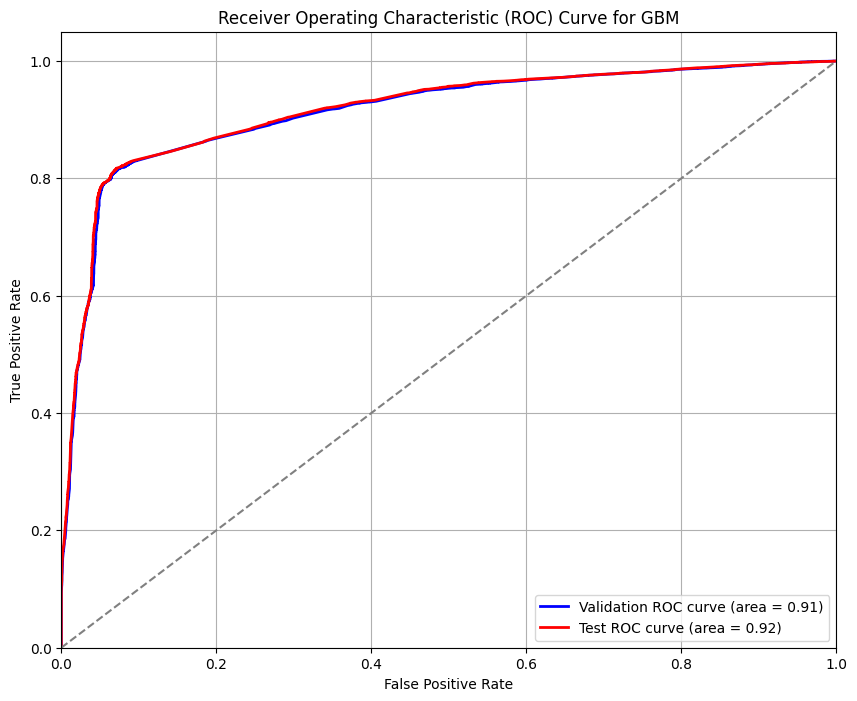

In [25]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = gbm.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = gbm.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [26]:
from sklearn.neural_network import MLPClassifier

# Train MLP classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)  # Increased max_iter for convergence
mlp.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = mlp.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.7567
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.79     20528
           1       0.85      0.62      0.72     20560

    accuracy                           0.76     41088
   macro avg       0.78      0.76      0.75     41088
weighted avg       0.78      0.76      0.75     41088

Test Accuracy: 0.7548
Test Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.78     20437
           1       0.86      0.62      0.72     20652

    accuracy                           0.75     41089
   macro avg       0.78      0.76      0.75     41089
weighted avg       0.78      0.75      0.75     41089



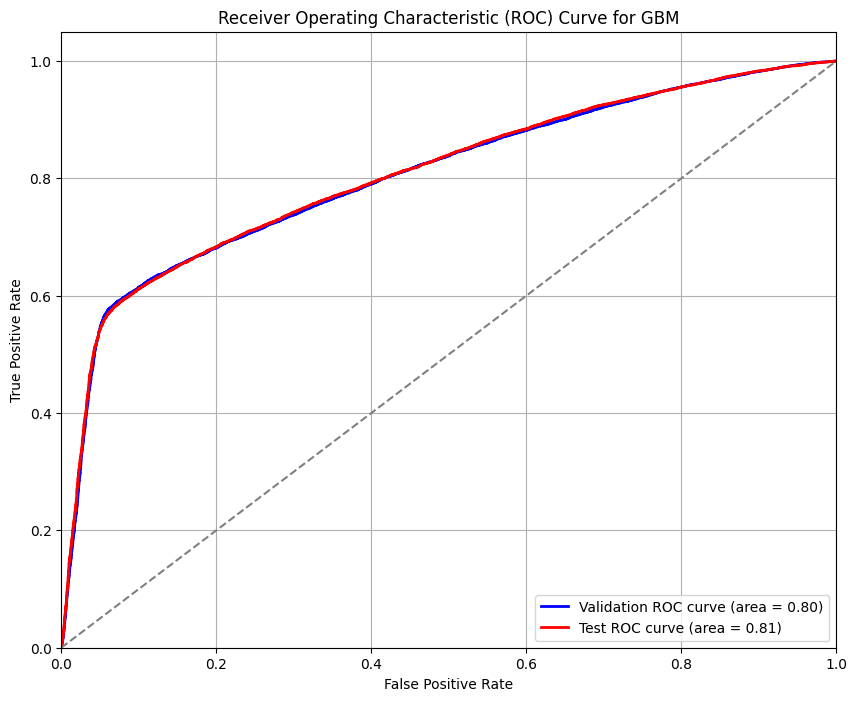

In [27]:
# Predict probabilities on the validation set for ROC
y_val_pred_prob = mlp.predict_proba(X_val)[:, 1]

# Calculate ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Predict probabilities on the test set for ROC
y_test_pred_prob = mlp.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for validation set
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val))

# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))

# Plot the diagonal line for chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GBM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Ensure the input data has the right shape (samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=-1)  # Adding the feature dimension
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

In [29]:
# CNN Model
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RNN Model
def build_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# Train and evaluate each model
models = {
    'CNN': build_cnn((X_train.shape[1], X_train.shape[2])),
    'RNN': build_rnn((X_train.shape[1], X_train.shape[2])),
    'LSTM': build_lstm((X_train.shape[1], X_train.shape[2]))
}

In [31]:
# Training loop
for model_name, model in models.items():
    print(f'\nTraining {model_name} model...')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)
    
    # Predict on the test set
    y_test_pred = (model.predict(X_test) > 0.5).astype(int).ravel()  # Threshold for binary classification
    
    # Evaluate the model
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Test Classification Report:')
    print(test_report)


Training CNN model...
Epoch 1/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7407 - loss: 0.5426 - val_accuracy: 0.7568 - val_loss: 0.5234
Epoch 2/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7568 - loss: 0.5185 - val_accuracy: 0.7563 - val_loss: 0.5128
Epoch 3/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7571 - loss: 0.5122 - val_accuracy: 0.7582 - val_loss: 0.5063
Epoch 4/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7589 - loss: 0.5043 - val_accuracy: 0.7601 - val_loss: 0.4985
Epoch 5/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7609 - loss: 0.4962 - val_accuracy: 0.7626 - val_loss: 0.4904
Epoch 6/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7646 - loss: 0.4860 - val_accuracy: 0.7643 - val_loss: 0.4839
Epoch 7/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7682 - loss: 0.4765 - val_accuracy: 0.7690 - val_loss: 0.4741
Epoch 8/10
5993/5993 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - acc

In [1]:
import shap

def shap_explain(model, X, plot_type='summary', instance_idx=0):
    """
    Function to generate SHAP explanations.

    Parameters:
    - model: Trained machine learning model (e.g., RandomForest).
    - X: DataFrame of input features.
    - plot_type: Type of plot ('summary', 'force', 'dependence').
    - instance_idx: Index of the instance to explain (used in force plot).
    """
    # Ensure input X is 2D
    if len(X.shape) == 1:
        X = X.reshape(1, -1)

    # Use TreeExplainer for tree-based models like RandomForest
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Generate the requested SHAP plot
    if plot_type == 'summary':
        shap.summary_plot(shap_values, X)
    elif plot_type == 'force':
        shap.initjs()
        instance = X.iloc[instance_idx:instance_idx + 1]
        shap.force_plot(explainer.expected_value[1], shap_values[1][instance_idx], instance)
    elif plot_type == 'dependence':
        shap.dependence_plot(X.columns[0], shap_values[1], X)
    else:
        raise ValueError("Invalid plot_type. Use 'summary', 'force', or 'dependence'.")


In [25]:
# If X_train is a DataFrame, ensure it is 2D
print(X_train.shape)  # Should be (n_samples, n_features)

(191745, 9)


In [ ]:
shap_explain(rf_clf, X_train, plot_type='summary')